In [1]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import pyMELTScalc as M
import pickle

sys.path.append(r'H:\My Drive\2022\GitHub\pyMELTScalc\MELTS')

import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12

M.__version__

'0.1.5'

In [2]:
Exp = pd.read_excel('Nandedkar2014.xlsx')
Elements = ['SiO2_Liq', 'TiO2_Liq', 'Al2O3_Liq', 'FeOt_Liq', 'MnO_Liq', 'MgO_Liq',
            'CaO_Liq', 'Na2O_Liq', 'K2O_Liq', 'P2O5_Liq']

In [3]:
bulk = {'SiO2_Liq': Exp['SiO2_Liq'].loc[1], 
        'TiO2_Liq': Exp['TiO2_Liq'].loc[1], 
        'Al2O3_Liq': Exp['Al2O3_Liq'].loc[1], 
        'FeOt_Liq': Exp['FeOt_Liq'].loc[1], 
        'MnO_Liq': Exp['MnO_Liq'].loc[1], 
        'MgO_Liq': Exp['MgO_Liq'].loc[1], 
        'CaO_Liq': Exp['CaO_Liq'].loc[1], 
        'Na2O_Liq': Exp['Na2O_Liq'].loc[1], 
        'K2O_Liq': Exp['K2O_Liq'].loc[1],
        'P2O5_Liq': Exp['P2O5_Liq'].loc[1], 
        'H2O_Liq': 0.05, 
        'CO2_Liq': 0.0,
       'Fe3Fet_Liq': 0.17}

#49.39	1.53	14.08	0.06	10.25	0.18	10.32	12.05	1.95	0.21	0.17


In [4]:
Exp[Elements] = 100*Exp[Elements].values/np.nansum(Exp[Elements], axis = 1).reshape(17,1)

In [5]:
# Results_MELTSv120 = M.multi_path(Model = "MELTSv1.2.0", comp = bulk,
#                        T_end_C = 850, dt_C = 2, 
#                        P_bar = np.array([1000, 4000,7000,10000]), find_liquidus = True,
#                        H2O_Liq = 3,
#                        Frac_solid = True, Frac_fluid = True,
#                        fO2_buffer = "NNO", fO2_offset = 0.0)

# Results_MELTSv102 = M.multi_path(Model = "MELTSv1.0.2", comp = bulk,
#                        T_end_C = 850, dt_C = 2, 
#                        P_bar = np.array([1000, 4000,7000,10000]), find_liquidus = True,
#                        H2O_Liq = 3,
#                        Frac_solid = True, Frac_fluid = True,
#                        fO2_buffer = "NNO", fO2_offset = 0.0)

# Results_pMELTS = M.multi_path(Model = "pMELTS", comp = bulk,
#                        T_end_C = 850, dt_C = 2, 
#                        P_bar = np.array([1000, 4000,7000,10000]), find_liquidus = True,
#                        H2O_Liq = 3,
#                        Frac_solid = True, Frac_fluid = True,
#                        fO2_buffer = "NNO", fO2_offset = 0.0)



In [6]:
# with open('Results_MELTSv120.pck', 'wb') as file_handle:
#     pickle.dump(Results_MELTSv120, file_handle)
# with open('Results_MELTSv102.pck', 'wb') as file_handle:
#     pickle.dump(Results_MELTSv102, file_handle)
# with open('Results_pMELTS.pck', 'wb') as file_handle:
#     pickle.dump(Results_pMELTS, file_handle)

In [7]:
with open('Results_MELTSv120.pck', 'rb') as file_handle:
    Results_MELTSv120 = pickle.load(file_handle)
with open('Results_MELTSv102.pck', 'rb') as file_handle:
    Results_MELTSv102 = pickle.load(file_handle)
with open('Results_pMELTS.pck', 'rb') as file_handle:
    Results_pMELTS = pickle.load(file_handle)

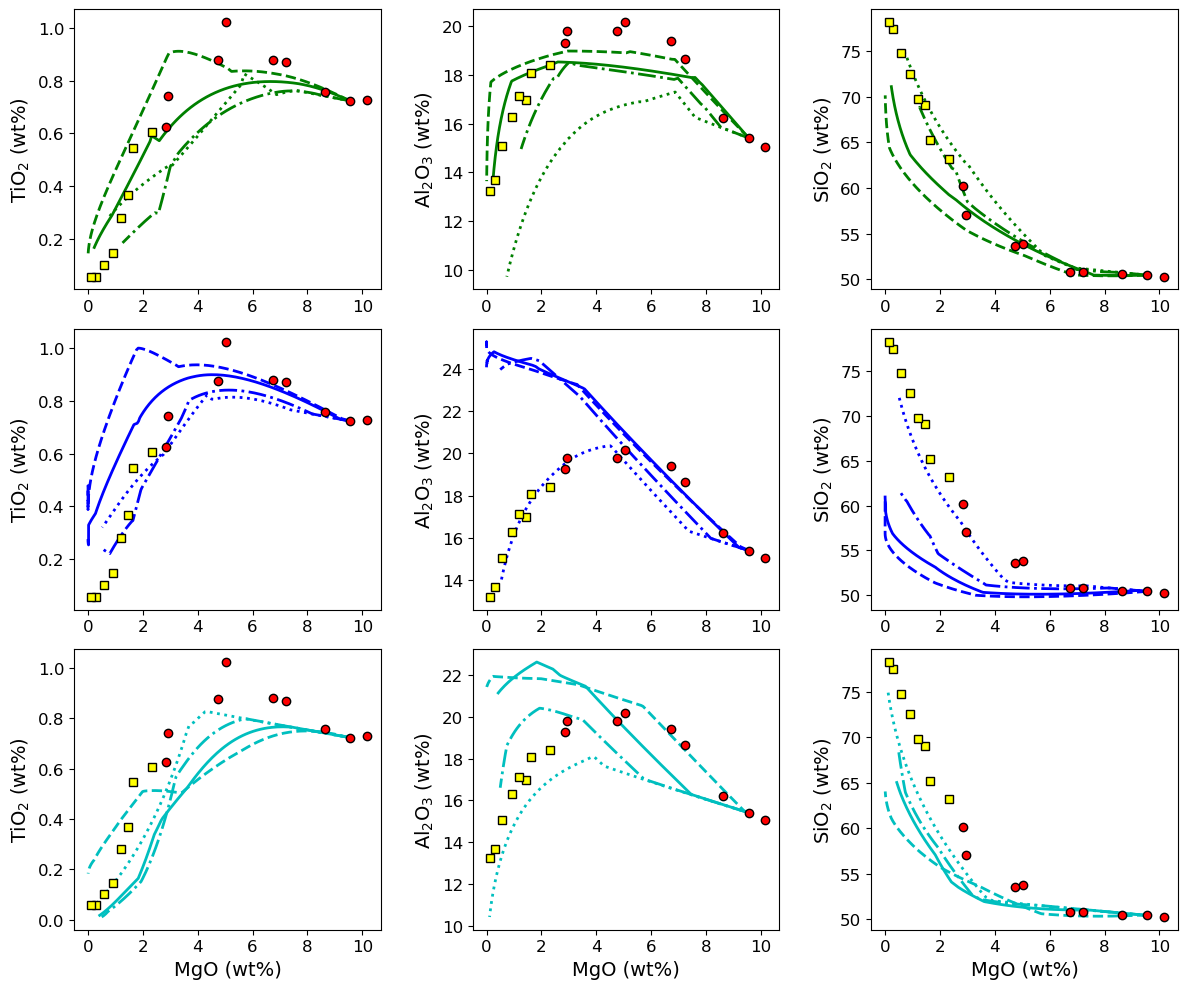

In [8]:
f, a = plt.subplots(3,3, figsize = (12,10), sharex = True)

y = ['TiO2_Liq', 'Al2O3_Liq', 'SiO2_Liq']

for index in Results_MELTSv102:
    Results_MELTSv102[index]['All'][Elements] = 100*Results_MELTSv102[index]['All'][Elements].values/np.nansum(Results_MELTSv102[index]['All'][Elements], axis = 1).reshape(len(Results_MELTSv102[index]['All']['SiO2_Liq']),1)
    Results_MELTSv120[index]['All'][Elements] = 100*Results_MELTSv120[index]['All'][Elements].values/np.nansum(Results_MELTSv120[index]['All'][Elements], axis = 1).reshape(len(Results_MELTSv120[index]['All']['SiO2_Liq']),1)
    Results_pMELTS[index]['All'][Elements] = 100*Results_pMELTS[index]['All'][Elements].values/np.nansum(Results_pMELTS[index]['All'][Elements], axis = 1).reshape(len(Results_pMELTS[index]['All']['SiO2_Liq']),1)

for i in range(3):    
    a[0][i].plot(Results_MELTSv120['index = 0']['All']['MgO_Liq'],
             Results_MELTSv120['index = 0']['All'][y[i]], ':', linewidth = 2, color = 'g') 
    a[0][i].plot(Results_MELTSv120['index = 1']['All']['MgO_Liq'],
             Results_MELTSv120['index = 1']['All'][y[i]], '-.', linewidth = 2, color = 'g') 
    a[0][i].plot(Results_MELTSv120['index = 2']['All']['MgO_Liq'],
             Results_MELTSv120['index = 2']['All'][y[i]], '-', linewidth = 2, color = 'g')
    a[0][i].plot(Results_MELTSv120['index = 3']['All']['MgO_Liq'],
             Results_MELTSv120['index = 3']['All'][y[i]], '--', linewidth = 2, color = 'g')
    a[0][i].plot(Exp['MgO_Liq'][Exp['MgO_Liq'] > 2.65], Exp[y[i]][Exp['MgO_Liq'] > 2.65], 'ok',
                markerfacecolor = 'red', label = 'No Amphibole')
    a[0][i].plot(Exp['MgO_Liq'][Exp['MgO_Liq'] <= 2.65], Exp[y[i]][Exp['MgO_Liq'] <= 2.65], 'sk',
                markerfacecolor = 'yellow', label = 'Contains Amphibole')
   
        
    a[1][i].plot(Results_MELTSv102['index = 0']['All']['MgO_Liq'],
             Results_MELTSv102['index = 0']['All'][y[i]], ':', linewidth = 2, color = 'b', label = "P = 1 kbar") 
    a[1][i].plot(Results_MELTSv102['index = 1']['All']['MgO_Liq'],
             Results_MELTSv102['index = 1']['All'][y[i]], '-.', linewidth = 2, color = 'b', label = "P = 4 kbar") 
    a[1][i].plot(Results_MELTSv102['index = 2']['All']['MgO_Liq'],
             Results_MELTSv102['index = 2']['All'][y[i]], '-', linewidth = 2, color = 'b', label = "P = 7 kbar")
    a[1][i].plot(Results_MELTSv102['index = 3']['All']['MgO_Liq'],
             Results_MELTSv102['index = 3']['All'][y[i]], '--', linewidth = 2, color = 'b', label = "P = 10 kbar")
    a[1][i].plot(Exp['MgO_Liq'][Exp['MgO_Liq'] > 2.65], Exp[y[i]][Exp['MgO_Liq'] > 2.65], 'ok',
                markerfacecolor = 'red')
    a[1][i].plot(Exp['MgO_Liq'][Exp['MgO_Liq'] <= 2.65], Exp[y[i]][Exp['MgO_Liq'] <= 2.65], 'sk',
                markerfacecolor = 'yellow')
    

    a[2][i].plot(Results_pMELTS['index = 0']['All']['MgO_Liq'],
             Results_pMELTS['index = 0']['All'][y[i]], ':', linewidth = 2, color = 'c', label = "P = 1 kbar") 
    a[2][i].plot(Results_pMELTS['index = 1']['All']['MgO_Liq'],
             Results_pMELTS['index = 1']['All'][y[i]], '-.', linewidth = 2, color = 'c', label = "P = 4 kbar") 
    a[2][i].plot(Results_pMELTS['index = 2']['All']['MgO_Liq'],
             Results_pMELTS['index = 2']['All'][y[i]], '-', linewidth = 2, color = 'c', label = "P = 7 kbar")
    a[2][i].plot(Results_pMELTS['index = 3']['All']['MgO_Liq'],
             Results_pMELTS['index = 3']['All'][y[i]], '--', linewidth = 2, color = 'c', label = "P = 10 kbar")
    a[2][i].plot(Exp['MgO_Liq'][Exp['MgO_Liq'] > 2.65], Exp[y[i]][Exp['MgO_Liq'] > 2.65], 'ok',
                markerfacecolor = 'red')
    a[2][i].plot(Exp['MgO_Liq'][Exp['MgO_Liq'] <= 2.65], Exp[y[i]][Exp['MgO_Liq'] <= 2.65], 'sk',
                markerfacecolor = 'yellow')
    
    
    a[2][i].set_xlabel('MgO (wt%)')
    a[0][i].xaxis.set_tick_params(which='both', labelbottom=True)
    a[1][i].xaxis.set_tick_params(which='both', labelbottom=True)
    a[i][0].set_ylabel('TiO$_2$ (wt%)')
    a[i][1].set_ylabel('Al$_2$O$_3$ (wt%)') 
    a[i][2].set_ylabel('SiO$_2$ (wt%)')
    
    
#a[0][2].legend()
#a[1][2].legend()
f.tight_layout()

plt.savefig("Nandedkar.png", dpi = 300, bbox_inches='tight')  

## Plotting by pressure instead

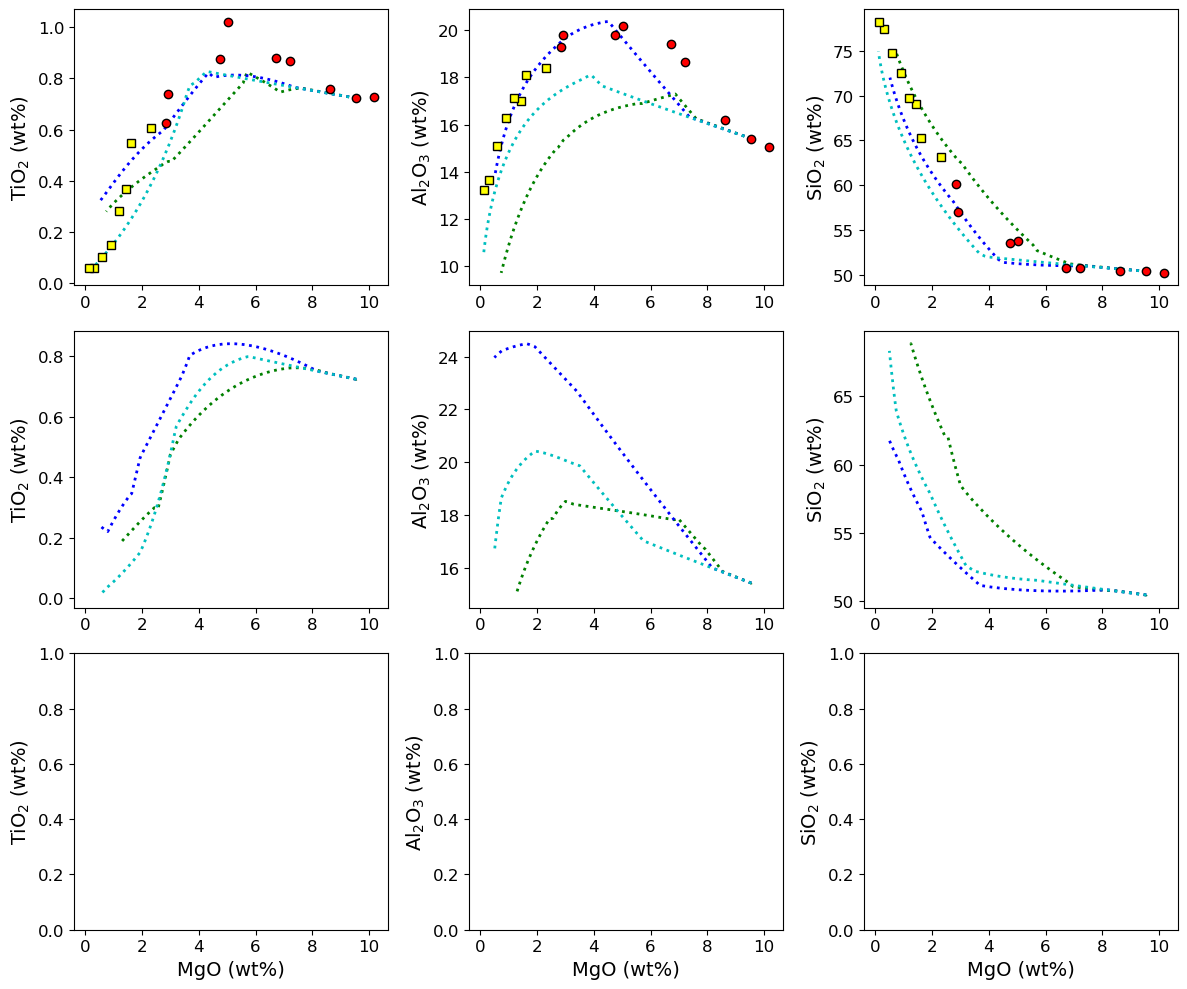

In [28]:
f, a = plt.subplots(3,3, figsize = (12,10), sharex = True)

y = ['TiO2_Liq', 'Al2O3_Liq', 'SiO2_Liq']

for index in Results_MELTSv102:
    Results_MELTSv102[index]['All'][Elements] = 100*Results_MELTSv102[index]['All'][Elements].values/np.nansum(Results_MELTSv102[index]['All'][Elements], axis = 1).reshape(len(Results_MELTSv102[index]['All']['SiO2_Liq']),1)
    Results_MELTSv120[index]['All'][Elements] = 100*Results_MELTSv120[index]['All'][Elements].values/np.nansum(Results_MELTSv120[index]['All'][Elements], axis = 1).reshape(len(Results_MELTSv120[index]['All']['SiO2_Liq']),1)
    Results_pMELTS[index]['All'][Elements] = 100*Results_pMELTS[index]['All'][Elements].values/np.nansum(Results_pMELTS[index]['All'][Elements], axis = 1).reshape(len(Results_pMELTS[index]['All']['SiO2_Liq']),1)

for i in range(3):    
    a[0][i].plot(Results_MELTSv120['index = 0']['All']['MgO_Liq'],
             Results_MELTSv120['index = 0']['All'][y[i]], ':', linewidth = 2, color = 'g') 
    a[0][i].plot(Results_MELTSv102['index = 0']['All']['MgO_Liq'],
             Results_MELTSv102['index = 0']['All'][y[i]], ':', linewidth = 2, color = 'b') 
    a[0][i].plot(Results_pMELTS['index = 0']['All']['MgO_Liq'],
             Results_pMELTS['index = 0']['All'][y[i]], ':', linewidth = 2, color = 'c') 


    a[1][i].plot(Results_MELTSv120['index = 1']['All']['MgO_Liq'],
             Results_MELTSv120['index = 1']['All'][y[i]], ':', linewidth = 2, color = 'g') 
    a[1][i].plot(Results_MELTSv102['index = 1']['All']['MgO_Liq'],
             Results_MELTSv102['index = 1']['All'][y[i]], ':', linewidth = 2, color = 'b') 
    a[1][i].plot(Results_pMELTS['index = 1']['All']['MgO_Liq'],
             Results_pMELTS['index = 1']['All'][y[i]], ':', linewidth = 2, color = 'c')    

    a[0][i].plot(Exp['MgO_Liq'][Exp['MgO_Liq'] > 2.65], Exp[y[i]][Exp['MgO_Liq'] > 2.65], 'ok',
                markerfacecolor = 'red', label = 'No Amphibole')
    a[0][i].plot(Exp['MgO_Liq'][Exp['MgO_Liq'] <= 2.65], Exp[y[i]][Exp['MgO_Liq'] <= 2.65], 'sk',
                markerfacecolor = 'yellow', label = 'Contains Amphibole')
    
    
    a[2][i].set_xlabel('MgO (wt%)')
    a[0][i].xaxis.set_tick_params(which='both', labelbottom=True)
    a[1][i].xaxis.set_tick_params(which='both', labelbottom=True)
    a[i][0].set_ylabel('TiO$_2$ (wt%)')
    a[i][1].set_ylabel('Al$_2$O$_3$ (wt%)') 
    a[i][2].set_ylabel('SiO$_2$ (wt%)')
    
    
#a[0][2].legend()
#a[1][2].legend()
f.tight_layout()

plt.savefig("Nandedkar.png", dpi = 300, bbox_inches='tight')  